## Importing libs

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from src.visualization.visualize import categorical_eda, timeseries_eda
sns.set(style = 'whitegrid')
%load_ext autoreload
%autoreload 2

## Loading data

In [2]:
df_raw = pd.read_csv('../data/interim/attr_added/ecregistration.csv')

E:\Gokul\Anaconda\envs\mldev\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (0,8,12,20,31) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
df_raw.head()

,id,state,district,poverty_line,case_no,caste,registration_date,mother_deleted,mother_deleted_time,female_child_born,female_child_live,infertility_options,infertility_refer,infertility_status,male_child_born,male_child_live,is_pregnant,pregnancy_test_result,pw_aadhaar_linked,re_reg_status,reason_for_deletion,registration_no,religion,rural_urban,wife_current_age,wife_marry_age,young_child_age_month,young_child_age_year,young_child_gender,hus_current_age,hus_marry_age,isactive,previous_status,created_on
0,1,Haryana,Panchkula,Not known,2.0,SC,2018-04-09 00:00:00,No,NaN,0.0,0.0,Default,NaN,N,0.0,0.0,No,NaN,Not known,ReRegistrationDone,NaN,1.060000e+11,Not known,Rural,25.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,2019-05-22 15:26:59
1,2,Haryana,Panchkula,Not known,2.0,SC,2018-04-02 00:00:00,No,NaN,0.0,0.0,Default,NaN,N,0.0,0.0,No,NaN,Not known,ReRegistrationDone,NaN,1.060000e+11,Not known,Rural,26.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,2019-05-22 15:26:59
2,3,Haryana,Panchkula,Not known,2.0,SC,2018-04-09 00:00:00,No,NaN,0.0,0.0,Default,NaN,N,0.0,0.0,No,NaN,Not known,ReRegistrationDone,NaN,1.060000e+11,Not known,Rural,30.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,2019-05-22 15:26:59
3,4,Haryana,Panchkula,Not known,2.0,Other,2018-04-09 00:00:00,No,NaN,0.0,0.0,Default,NaN,N,0.0,0.0,No,NaN,Not known,ReRegistrationDone,NaN,1.060000e+11,Not known,Rural,28.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,2019-05-22 15:26:59
4,5,Haryana,Panchkula,Not known,2.0,Other,2018-04-09 00:00:00,No,NaN,0.0,0.0,Default,NaN,N,0.0,0.0,No,NaN,Not known,ReRegistrationDone,NaN,1.060000e+11,Not known,Rural,32.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,2019-05-22 15:26:59


In [4]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1741979 entries, 0 to 1741978
Data columns (total 34 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   id                     object 
 1   state                  object 
 2   district               object 
 3   poverty_line           object 
 4   case_no                float64
 5   caste                  object 
 6   registration_date      object 
 7   mother_deleted         object 
 8   mother_deleted_time    object 
 9   female_child_born      float64
 10  female_child_live      float64
 11  infertility_options    object 
 12  infertility_refer      object 
 13  infertility_status     object 
 14  male_child_born        float64
 15  male_child_live        float64
 16  is_pregnant            object 
 17  pregnancy_test_result  object 
 18  pw_aadhaar_linked      object 
 19  re_reg_status          object 
 20  reason_for_deletion    object 
 21  registration_no        float64
 22  religion          

In [5]:
df_raw.tail()

,id,state,district,poverty_line,case_no,caste,registration_date,mother_deleted,mother_deleted_time,female_child_born,female_child_live,infertility_options,infertility_refer,infertility_status,male_child_born,male_child_live,is_pregnant,pregnancy_test_result,pw_aadhaar_linked,re_reg_status,reason_for_deletion,registration_no,religion,rural_urban,wife_current_age,wife_marry_age,young_child_age_month,young_child_age_year,young_child_gender,hus_current_age,hus_marry_age,isactive,previous_status,created_on
1741974,1741975,Haryana,Panchkula,APL,2.0,Other,2019-12-12 00:00:00,No,NaN,0.0,0.0,Default,NaN,N,0.0,0.0,Yes,Test Not Done,No,ReRegistrationDone,NaN,1.060041e+11,Hindu,Rural,20.0,18.0,0.0,0.0,0,NaN,NaN,NaN,NaN,2020-05-30 11:41:59
1741975,1741976,Haryana,Kaithal,APL,1.0,Other,2019-08-16 00:00:00,No,NaN,0.0,0.0,Default,NaN,N,0.0,0.0,Yes,Positive,No,Eligible,NaN,1.060044e+11,Hindu,Rural,21.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,2020-03-13 13:46:00
1741976,1741977,Haryana,Kaithal,APL,1.0,Other,2019-05-15 00:00:00,No,NaN,0.0,0.0,Default,NaN,N,0.0,0.0,Yes,Positive,No,ReRegistrationDone,NaN,1.060044e+11,Hindu,Rural,21.0,21.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,2020-03-17 12:01:00
1741977,1741978,Haryana,Karnal,APL,2.0,Other,2019-08-07 00:00:00,No,NaN,1.0,1.0,Default,NaN,N,0.0,0.0,Yes,Positive,No,ReRegistrationDone,NaN,1.060038e+11,Sikh,Rural,36.0,21.0,0.0,6.0,F,NaN,NaN,NaN,NaN,2020-05-26 13:49:13
1741978,\.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df = df_raw.iloc[:-1, :].copy()

## EDA

### id

In [7]:
df['id'].nunique()

1741978

### state

Unique values: ['Haryana']
No. of unique values: 1
Missing values count: 0 / 1741978
Missing values %: 0.0
Value counts: 
Haryana    100.0
Name: state, dtype: float64


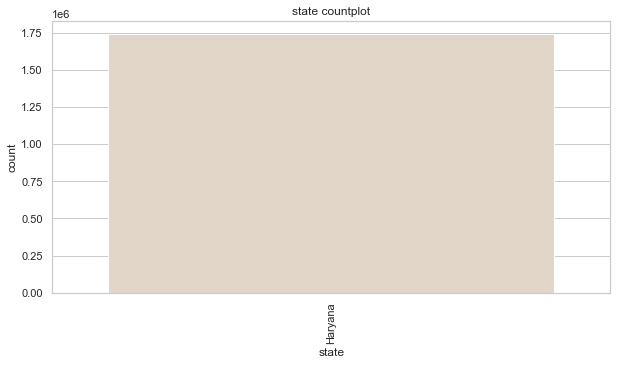

In [8]:
categorical_eda(df, 'state', (10, 5))

### district

Unique values: ['Panchkula' 'Mewat' 'Palwal' 'Yamunanagar' 'Ambala' 'Mahendragarh'
 'Karnal' 'Gurgaon' 'Hisar' 'Jind' 'Sirsa' 'Kaithal']
No. of unique values: 12
Missing values count: 0 / 1741978
Missing values %: 0.0
Value counts: 
Karnal          14.037261
Jind            13.521239
Hisar           13.231510
Yamunanagar     11.369317
Kaithal          9.811720
Sirsa            8.207853
Ambala           8.207164
Mewat            7.327417
Gurgaon          3.992358
Mahendragarh     3.555613
Panchkula        3.436266
Palwal           3.302281
Name: district, dtype: float64


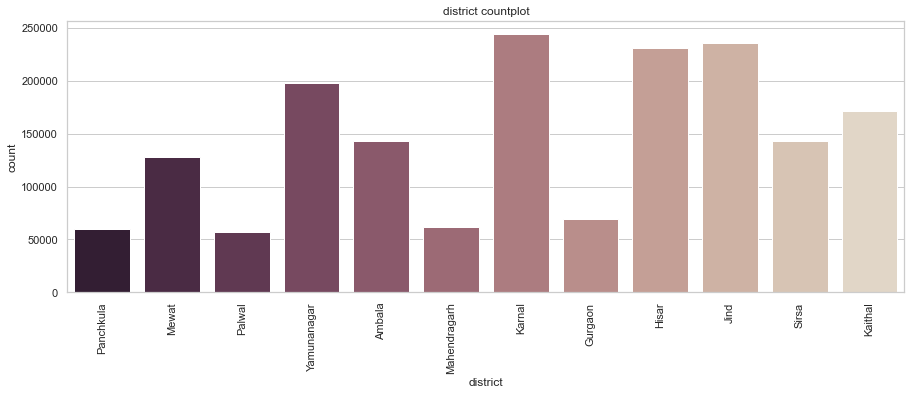

In [11]:
categorical_eda(df, 'district', (15, 5))

### poverty_line

Unique values: ['Not known' 'APL' 'BPL']
No. of unique values: 3
Missing values count: 0 / 1741978
Missing values %: 0.0
Value counts: 
APL          48.818010
Not known    37.124235
BPL          14.057755
Name: poverty_line, dtype: float64


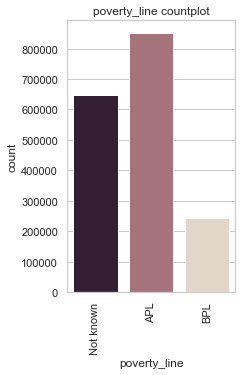

In [15]:
categorical_eda(df, 'poverty_line', (3, 5))

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1741978 entries, 0 to 1741977
Data columns (total 34 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   id                     object 
 1   state                  object 
 2   district               object 
 3   poverty_line           object 
 4   case_no                float64
 5   caste                  object 
 6   registration_date      object 
 7   mother_deleted         object 
 8   mother_deleted_time    object 
 9   female_child_born      float64
 10  female_child_live      float64
 11  infertility_options    object 
 12  infertility_refer      object 
 13  infertility_status     object 
 14  male_child_born        float64
 15  male_child_live        float64
 16  is_pregnant            object 
 17  pregnancy_test_result  object 
 18  pw_aadhaar_linked      object 
 19  re_reg_status          object 
 20  reason_for_deletion    object 
 21  registration_no        float64
 22  religion          

### case_no

Unique values: [2. 1. 3. 4. 5.]
No. of unique values: 5
Missing values count: 0 / 1741978
Missing values %: 0.0
Value counts: 
1.0    56.353008
2.0    43.059786
3.0     0.563842
4.0     0.022044
5.0     0.001320
Name: case_no, dtype: float64


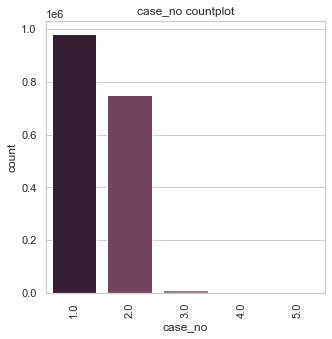

In [18]:
categorical_eda(df, 'case_no', (5, 5))

### caste

Unique values: ['SC' 'Other' 'Not known' 'ST']
No. of unique values: 4
Missing values count: 0 / 1741978
Missing values %: 0.0
Value counts: 
Other        71.465311
SC           23.809658
Not known     4.342822
ST            0.382209
Name: caste, dtype: float64


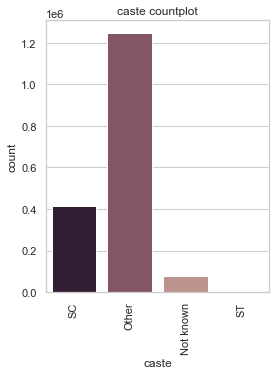

In [20]:
categorical_eda(df, 'caste', (4, 5))

### registration_date

Unique values: ['2018-04-09 00:00:00' '2018-04-02 00:00:00' '2018-04-04 00:00:00' ...
 '2020-06-10 00:00:00' '2020-06-24 00:00:00' '2020-05-27 00:00:00']
No. of unique values: 1155
Missing values count: 0 / 1741978
Missing values %: 0.0
Value counts: 
2018-04-01 00:00:00    4.692310
2019-03-01 00:00:00    3.531847
2017-04-01 00:00:00    3.522892
2018-04-04 00:00:00    3.355209
2019-04-01 00:00:00    3.117261
                         ...   
2020-05-17 00:00:00    0.000057
2020-05-28 00:00:00    0.000057
2020-05-24 00:00:00    0.000057
2020-11-15 00:00:00    0.000057
2020-06-24 00:00:00    0.000057
Name: registration_date, Length: 1155, dtype: float64
Description: 
count        40.00000
mean      43549.45000
std       70193.32739
min           1.00000
25%       10704.75000
50%       17025.50000
75%       39217.25000
max      363339.00000
Name: id, dtype: float64


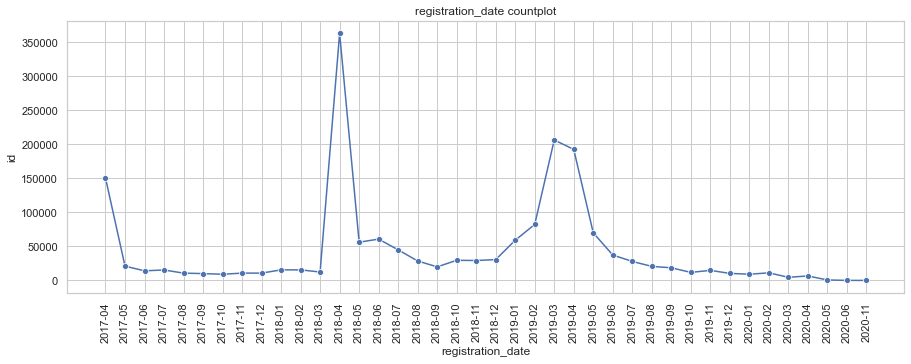

In [25]:
timeseries_eda(df, 'registration_date', (15, 5))

### mother_deleted

In [26]:
df['mother_deleted'].nunique()

2

Unique values: ['No' 'Yes']
No. of unique values: 2
Missing values count: 0 / 1741978
Missing values %: 0.0
Value counts: 
No     99.92032
Yes     0.07968
Name: mother_deleted, dtype: float64


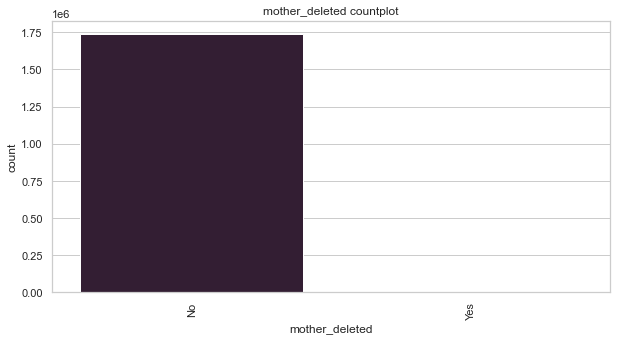

In [30]:
categorical_eda(df, 'mother_deleted', (10, 5))